In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split

In [118]:
df = pd.read_csv("hacktrain.csv")
df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [119]:
df= df.drop(columns=['Unnamed: 0', 'ID'])

In [120]:
df.head()

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,-1325.64,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,-3162.14,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,1242.87,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


<Axes: >

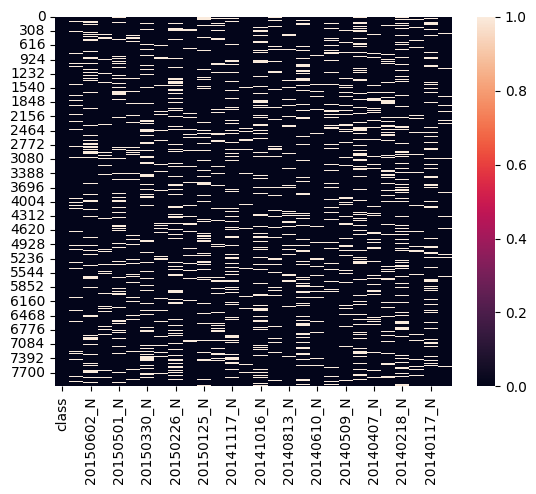

In [121]:
sns.heatmap(df.isnull())

In [122]:
duplicate= df[df.duplicated()]
print("Number of Duplicate Rows:",len(duplicate))
print((df == np.inf).sum())

Number of Duplicate Rows: 0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


In [123]:
X = df.drop(columns=['class'])  # Features (NDVI time series)
y = df['class']                 # Target labels

In [124]:
#KNN imputer
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)
df = pd.concat([X, y], axis=1)

<Axes: >

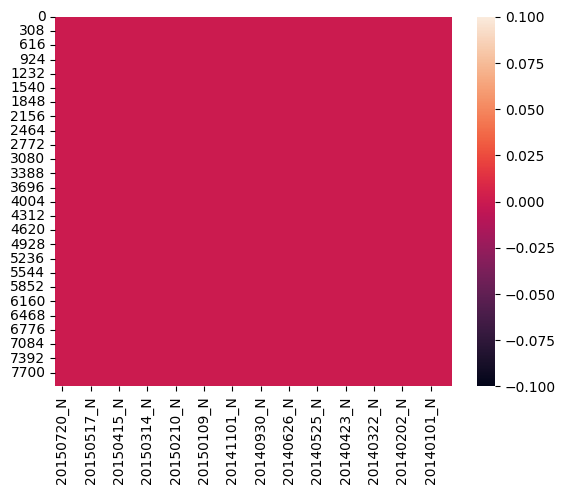

In [125]:
sns.heatmap(df.isnull())

In [126]:
#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

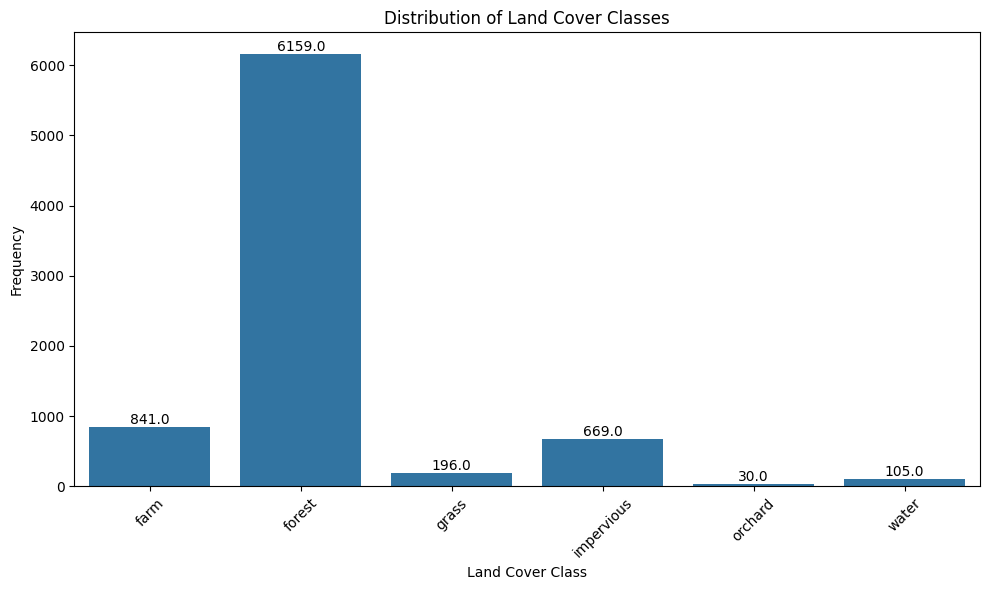

In [127]:
y_original = df['class']
le = LabelEncoder()
y = le.fit_transform(y_original)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('Land Cover Class')
plt.ylabel('Frequency')
plt.title('Distribution of Land Cover Classes')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.tight_layout()
plt.show()

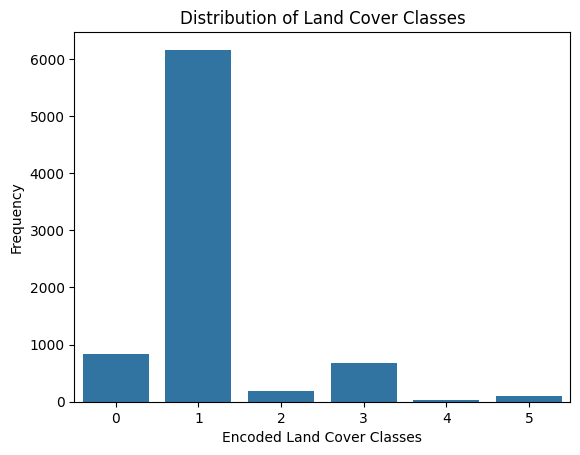

In [128]:
le = LabelEncoder()
y = le.fit_transform(y)
sns.countplot(x=y)
plt.xlabel('Encoded Land Cover Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Land Cover Classes')
plt.show()

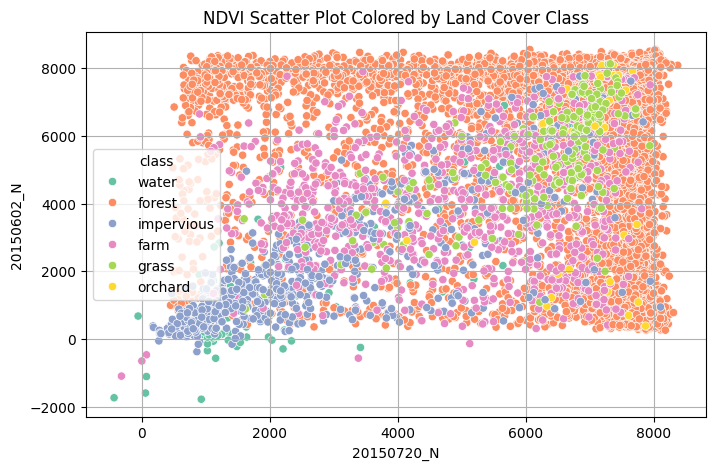

In [129]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='20150720_N', y='20150602_N', hue='class', palette='Set2')
plt.title('NDVI Scatter Plot Colored by Land Cover Class')
plt.grid(True)
plt.show()

In [143]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['class'])

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [133]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [135]:
print(f"✅ Logistic Regression accuracy with StandardScaler: {accuracy:.4f}")
print("\nClassification Report:")
print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)

✅ Logistic Regression accuracy with StandardScaler: 0.8812

Classification Report:
Number of classes: 6
Classes: [0 1 2 3 4 5]


In [63]:
#Using LR from original data
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train,y_train)

C:\Users\Priyangshu Malakar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [65]:
y_pred = model.predict(X_test)

In [70]:
model.predict(X_test)

array(['forest', 'forest', 'impervious', ..., 'forest', 'forest',
       'forest'], shape=(1600,), dtype=object)

In [74]:
print("Accuracy:", model.score(X_test,y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.876875
              precision    recall  f1-score   support

        farm       0.67      0.49      0.57       168
      forest       0.91      0.97      0.94      1232
       grass       0.52      0.28      0.37        39
  impervious       0.82      0.80      0.81       134
     orchard       0.20      0.17      0.18         6
       water       0.71      0.57      0.63        21

    accuracy                           0.88      1600
   macro avg       0.64      0.55      0.58      1600
weighted avg       0.86      0.88      0.87      1600



In [75]:
model.predict_proba(X_test)

array([[9.08395550e-04, 9.96601074e-01, 3.48747620e-06, 2.48683482e-03,
        1.49029298e-12, 2.07728777e-07],
       [1.09434196e-03, 9.97940595e-01, 1.23909599e-04, 8.39269032e-04,
        7.65973175e-08, 1.80820334e-06],
       [1.19996369e-01, 6.66231210e-02, 1.56987603e-02, 7.49502652e-01,
        8.24679518e-04, 4.73544178e-02],
       ...,
       [1.75352868e-02, 9.71651778e-01, 4.31921953e-03, 1.58872582e-03,
        9.88596426e-05, 4.80612993e-03],
       [2.05502527e-01, 7.80959021e-01, 7.31262353e-03, 4.16230956e-03,
        1.65945880e-03, 4.04060437e-04],
       [4.44679518e-04, 9.97453607e-01, 5.32975365e-04, 1.56854344e-03,
        2.32721688e-12, 1.94861206e-07]], shape=(1600, 6))

In [76]:
#0.09% probability the sample is farm
#99.6% chance it's forest
#Very low probabilities for other classes

<Figure size 800x600 with 0 Axes>

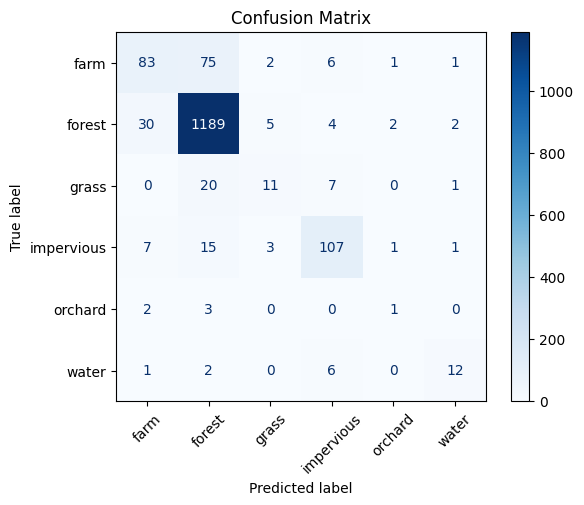

In [78]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [136]:
#Predict Original Data
hacktest = pd.read_csv("hacktest.csv")

In [137]:
ids = hacktest['ID']

In [138]:
X_hacktest = hacktest.drop(columns=['ID', 'Unnamed: 0'])

In [139]:
X_hacktest.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


<Axes: >

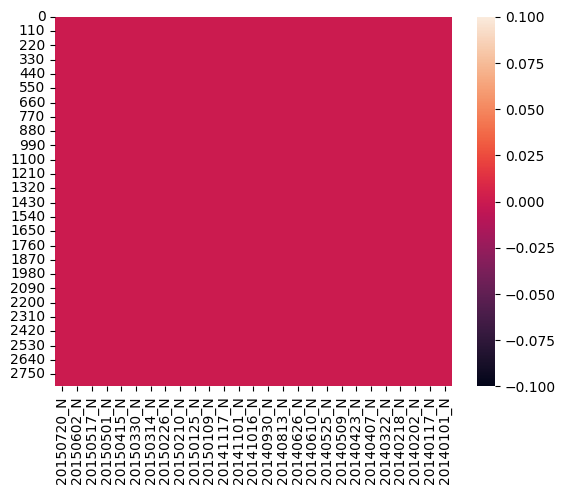

In [140]:
sns.heatmap(X_hacktest.isnull())

In [111]:
y_hacktest_pred = model.predict(X_hacktest)

In [114]:
submission = pd.DataFrame({
    'ID': ids,
    'Predicted Class': y_hacktest_pred
})

In [115]:
submission.to_csv("submission.csv", index=False)

print("✅ Predictions saved to submission.csv")

✅ Predictions saved to submission.csv


In [144]:
#Predict by Scaled data
X_hacktest_scaled = scaler.transform(X_hacktest)

In [146]:
y_hacktest_pred = model.predict(X_hacktest_scaled)


In [148]:
submission = pd.DataFrame({
    'ID': ids,
    'Predicted Class': y_hacktest_pred
})
submission.to_csv('submission.csv', index=False)
print("✅ Submission saved to submission.csv")

✅ Submission saved to submission.csv
